In [1]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import os
import numpy as np

Using TensorFlow backend.


In [11]:
#processing the labels of raw IMDB data

imdb_dir = "C:/Users/Business Intelli/Desktop/NLP/Imdb/aclImdb"

train_dir = "C:/Users/Business Intelli/Desktop/NLP/Imdb/aclImdb/train"

labels = []

texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f= open(os.path.join(dir_name, fname), encoding = "utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

Found 88582 unique tokens.


In [14]:
data = pad_sequences(sequences, maxlen= maxlen)
labels = np.asarray(labels)
print("shape of data tensor:", data.shape)
print('shape of label tensor:', labels.shape)

shape of data tensor: (25000, 100)
shape of label tensor: (25000,)


In [18]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples+ validation_samples]
y_val = labels[training_samples: training_samples+validation_samples]

In [2]:
glove_dir = "C:/Users/Business Intelli/Desktop/NLP/glove.6B.100d.txt"

embeddings_index = {}
f = open(glove_dir, encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word]=coefs
f.close()
print("Found %s word  vectors." %len(embeddings_index))

Found 400000 word  vectors.


In [19]:
embedding_dim = 100
max_words = 10000
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

W0713 13:39:06.095180 15160 deprecation_wrapper.py:119] From C:\Users\Business Intelli\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0713 13:39:06.099179 15160 deprecation_wrapper.py:119] From C:\Users\Business Intelli\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



In [26]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

W0713 13:41:11.062976 15160 deprecation_wrapper.py:119] From C:\Users\Business Intelli\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 13:41:11.098976 15160 deprecation.py:323] From C:\Users\Business Intelli\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/step - loss: 1.2316 - acc: 0.4850 - val_loss: 0.6927 - val_acc: 0.5294
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6326 - acc: 0.6600 - val_loss: 0.8184 - val_acc: 0.5004
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5363 - acc: 0.7750 - val_loss: 0.7890 - val_acc: 0.5007
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.4338 - acc: 0.8350 - val_loss: 0.8769 - val_acc: 0.5019
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2717 - acc: 0.9500 - val_loss: 1.0348 - val_acc: 0.4999
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2488 - acc: 0.9200 - val_loss: 0.8632 - val_acc: 0.5134
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2034 - acc: 0.9700 - val_loss: 0.7134 - val_acc: 0.5591
Epoch 8/10
200/200 [========

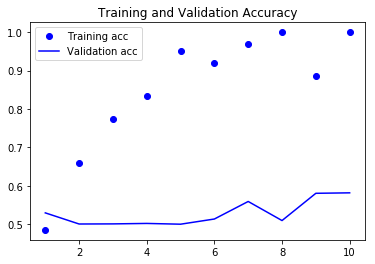

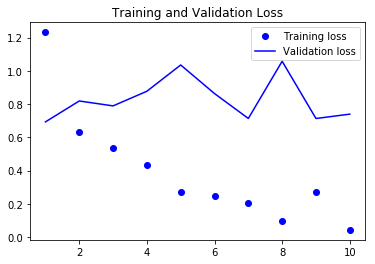

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Validation Loss")
plt.legend()

plt.show()